In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix , classification_report

In [14]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

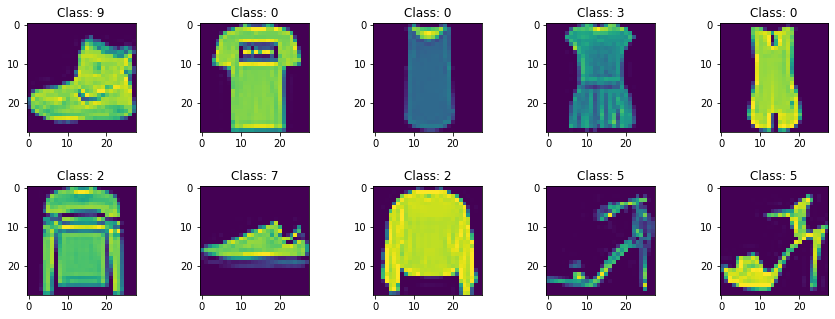

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [5]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

#fit and transform training dataset
X_train = minmax.fit_transform(X_train)

#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
from sklearn import svm

In [7]:
# Build and train a linear SVC model
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [8]:
# Make predictions
y_pred = svc.predict(X_test)

# Get accuracy scores
print("training:",svc.score(X_train, y_train).round(3))
print("testing: ",svc.score(X_test, y_test).round(3))

training: 0.913
testing:  0.883


In [9]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [11]:
import seaborn as sns

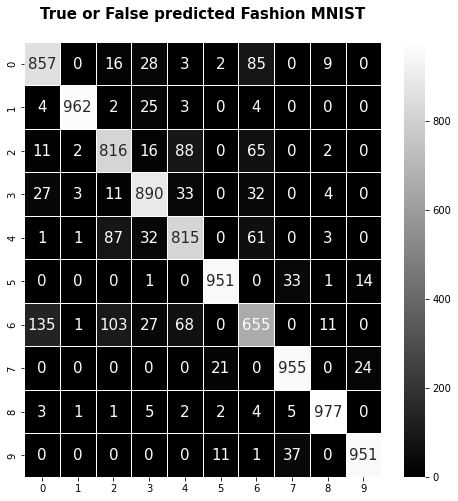

In [12]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test,y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(8,8))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()